<a href="https://colab.research.google.com/github/data-with-shobhit/Web-Scraping-Data-Handling-JustWatch/blob/main/Module_2_Web_Scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here


movie_url = []
for x in soup.find_all('a',attrs={'class':'title-list-grid__item--link'}):
  movie_url.append('https://www.justwatch.com'+x['href'])
print(movie_url)
print(len(movie_url))

['https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/aadujeevitham', 'https://www.justwatch.com/in/movie/furiosa', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/garudan-2024', 'https://www.justwatch.com/in/movie/maharshi', 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes', 'https://www.justwatch.com/in/movie/sri-2023', 'https://www.justwatch.com/in/movie/inside-out', 'https://www.justwatch.com/in/movie/civil-war-2024-0', 'https://www.justwatch.com/in/movie/harom-hara', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/deadpool-3'

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
import time
movie_title = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    full_title = soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('h1')[0].text
    title = full_title.split('(')[0].strip()
  except:
    title = "NA"
  movie_title.append(title)
  time.sleep(2)
print(movie_title)
print(len(movie_title))

['Maharaja', 'Kalki 2898 AD', 'Kill', 'Munjya', 'The Gangster, the Cop, the Devil', 'Family Star', 'Aavesham', 'The Goat Life', 'Furiosa: A Mad Max Saga', 'The Fall Guy', 'Garudan', 'Maharshi', 'Kingdom of the Planet of the Apes', 'Srikanth', 'Inside Out', 'Civil War', 'Harom Hara', 'Godzilla x Kong: The New Empire', 'Deadpool & Wolverine', 'Manjummel Boys', 'Kung Fu Panda 4', '365 Days', 'Bad Boys: Ride or Die', 'Dune: Part Two', 'Deadpool', 'Je Jatt Vigarh Gya', 'Godzilla Minus One', 'Maharaj', 'Hit Man', 'Oppenheimer', 'Laapataa Ladies', 'Addicted', 'Wild Wild Punjab', 'Guruvayoor Ambalanadayil', 'Mr. & Mrs. Mahi', 'Animal', 'Monster', 'Inside Out 2', 'Chandu Champion', 'Maidaan', 'Satyabhama', 'The Ministry of Ungentlemanly Warfare', 'A Quiet Place: Day One', 'Aranmanai 4', 'Salaar', 'Rockstar', 'Dune', 'Bhaiyya Ji', 'Triangle', 'Premalu', 'Perfect Days', 'Laila Majnu', 'Hanu-Man', '12th Fail', 'Mad Max: Fury Road', 'Stree', 'Agent', 'The Zone of Interest', 'Challengers', 'Heredita

## **Scrapping release Year**

In [ ]:
# Write Your Code here

import time
release_year = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
  except:
    year = 'NA'
  release_year.append(year)
  time.sleep(3)
print(release_year)
print(len(release_year))

[2024, 2024, 2024, 2024, 2019, 2024, 2024, 2024, 2024, 2024, 2024, 2019, 2024, 2024, 2015, 2024, 2024, 2024, 2024, 2024, 2024, 2020, 2024, 2024, 2016, 2024, 2023, 2024, 2024, 2023, 2024, 2014, 2024, 2024, 2024, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2023, 2011, 2021, 2024, 2009, 2024, 2023, 2018, 2024, 2023, 2015, 2018, 2023, 2023, 2024, 2018, 2024, 2024, 2022, 2024, 2024, 2018, 2023, 2018, 2024, 2022, 2022, 2024, 2023, 2013, 2001, 2011, 2024, 2024, 2018, 2024, 2023, 2024, 2024, 2018, 2023, 2019, 2023, 2024, 2024, 2024, 2000, 2024, 2024, 2021, 2022, 2024, 2016, 2015, 2021, 2010]
100


## **Scrapping Genres**

In [ ]:
# Write Your Code here
import time
genre_list = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = 'NA'
  genre_list.append(genres)
  time.sleep(3)
print(genre_list)
print(len(genre_list))

['Mystery & Thriller, Action & Adventure, Crime, Drama', 'Drama, Science-Fiction, Mystery & Thriller, Action & Adventure, Fantasy', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Comedy, Horror', 'Crime, Action & Adventure, Mystery & Thriller', 'Drama, Action & Adventure, Comedy, Romance', 'Comedy, Action & Adventure', 'Drama', 'Mystery & Thriller, Action & Adventure, Science-Fiction', 'Action & Adventure, Comedy, Drama, Romance', 'Action & Adventure, Crime, Mystery & Thriller', 'Action & Adventure, Drama', 'Action & Adventure, Science-Fiction, Drama, Mystery & Thriller', 'Drama', 'Animation, Kids & Family, Action & Adventure, Drama, Comedy, Fantasy', 'Mystery & Thriller, Action & Adventure, War & Military, Drama', 'Action & Adventure, Crime, Drama', 'Mystery & Thriller, Action & Adventure, Fantasy, Science-Fiction', 'Comedy, Science-Fiction, Action & Adventure', 'Drama, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Comedy, Kids & Family, Fantasy, Animation', 

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
import time
imdb_rating = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
       full_rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
       rating = full_rating.split('(')[0].strip()
  except:
    rating = 'NA'
  imdb_rating.append(rating)
  time.sleep(3)
print(imdb_rating)
print(len(imdb_rating))

['8.7', '8.7', '8.7', '8.7', '6.9', '5.3', '7.9', '8.3', '8.3', '8.3', '7.2', '7.2', '7.2', '7.5', '8.1', '7.1', '8.3', '8.3', '8.3', '8.3', '6.3', '3.3', '3.3', '3.3', '8.0', '8.0', '7.7', '6.5', '6.9', '8.3', '8.5', '5.0', '6.6', '6.6', '6.2', '6.2', '7.8', '7.8', '7.8', '8.1', '6.7', '6.9', '6.9', '5.2', '6.5', '7.8', '8.0', '5.7', '5.7', '7.9', '7.9', '7.7', '7.8', '8.9', '8.1', '7.5', '7.5', '7.4', '7.4', '7.3', '6.6', '6.6', '7.1', '6.1', '7.4', '7.5', '7.7', '7.6', '6.7', '7.0', '8.1', '8.1', '6.5', '8.2', '7.6', '7.6', '7.1', '5.9', '5.9', '5.2', '7.0', '5.8', '7.9', '7.9', '7.9', '6.5', '6.1', '6.1', '6.4', '4.1', '8.5', '8.5', '6.3', '8.2', '8.3', '8.3', '7.1', '4.2', '7.6', '7.6']
100


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
import time
movie_runtime = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':"detail-infos"}):
       if x.find_all('h3',attrs = {'class':'detail-infos__subheading'})[0].text == 'Runtime':
          Runtime = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text

  except:
    Runtime = "NA"
  movie_runtime.append(Runtime)
  time.sleep(2)
print(movie_runtime)
print(len(movie_runtime))

['2h 30min', '3h 1min', '1h 45min', '2h 3min', '1h 50min', '2h 39min', '2h 38min', '2h 51min', '2h 28min', '2h 6min', '2h 13min', '2h 56min', '2h 25min', '2h 14min', '1h 35min', '1h 49min', '2h 34min', '1h 55min', '2h 8min', '2h 15min', '1h 34min', '1h 54min', '1h 55min', '2h 47min', '1h 48min', '2h 12min', '2h 4min', '2h 12min', '1h 56min', '3h 0min', '2h 2min', '1h 45min', '1h 51min', '2h 12min', '2h 19min', '3h 24min', '2h 7min', '1h 37min', '2h 22min', '3h 1min', '2h 12min', '2h 0min', '1h 39min', '2h 28min', '2h 55min', '2h 39min', '2h 35min', '2h 30min', '1h 38min', '2h 36min', '2h 4min', '2h 19min', '2h 39min', '2h 26min', '2h 0min', '2h 7min', '2h 34min', '1h 45min', '2h 12min', '2h 8min', '2h 3min', '1h 41min', '3h 9min', '1h 55min', '2h 28min', '1h 30min', '2h 30min', '2h 0min', '1h 44min', '1h 47min', '2h 52min', '2h 14min', '1h 58min', '3h 0min', '2h 32min', '1h 30min', '2h 23min', '1h 58min', '1h 53min', '1h 33min', '2h 49min', '2h 40min', '2h 19min', '2h 36min', '2h 13min

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here


Age_rating = []

for url in movie_url:
    rating_age = "NA"  # Initialize rating_age here
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')

        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            if x.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Age rating':
                rating_age = x.find_all('div', attrs={'class': 'detail-infos__value'})[0].text
                break  # Stop searching once we've found the rating
    except Exception as e:
        print(f"An error occurred: {e}")

    Age_rating.append(rating_age)
    time.sleep(2)

print(Age_rating)
print(len(Age_rating))


['NA', 'UA', 'A', 'NA', 'NA', 'NA', 'NA', 'UA', 'A', 'UA', 'UA', 'UA', 'NA', 'U', 'U', 'NA', 'A', 'UA', 'A', 'UA', 'U', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'A', 'UA', 'UA', 'NA', 'NA', 'NA', 'U', 'A', 'NA', 'U', 'UA', 'NA', 'UA', 'NA', 'NA', 'NA', 'A', 'UA', 'UA', 'NA', 'A', 'U', 'NA', 'UA', 'UA', 'NA', 'A', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'A', 'A', 'NA', 'A', 'A', 'UA', 'A', 'NA', 'A', 'U', 'UA', 'A', 'A', 'U', 'NA', 'UA', 'UA', 'A', 'NA', 'UA', 'NA', 'UA', 'UA', 'A', 'A', 'A', 'NA', 'UA', 'UA', 'NA', 'A', 'NA', 'UA', 'UA', 'NA', 'UA', 'NA', 'UA', 'NA']
100


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
import time
movie_production_country = []
for url in movie_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')

    for x in soup.find_all('div',attrs = {'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text ==' Production country ':
         country = x.find_all('div',attrs = {'class':'detail-infos__value'})[0].text

  except:
    country = "NA"
  movie_production_country.append(country)
  time.sleep(2)
print(movie_production_country)
print(len(movie_production_country))

['India', 'India', 'United States, India', 'India', 'South Korea', 'India', 'India', 'India, United States', 'Australia, United States', 'United States, Australia, Canada', 'India', 'India', 'United States', 'India', 'United States', 'United Kingdom, United States', 'India', 'United States, Australia', 'United States', 'India', 'United States', 'Poland', 'United States', 'United States', 'United States', 'India', 'Japan', 'India', 'United States', 'United States, United Kingdom', 'India', 'United States', 'India', 'India', 'India', 'India', 'Japan', 'United States', 'India', 'India', 'India', 'United Kingdom, Turkey, United States', 'Canada, United States, United Kingdom', 'India', 'India', 'India', 'United States', 'India', 'Australia, United Kingdom', 'India', 'Germany, Japan', 'India', 'India', 'India', 'United States, Australia', 'India', 'India', 'United Kingdom, United States, Poland', 'United States, Italy', 'United States', 'India', 'Canada, United States', 'United States', 'Un

## **Fetching Streaming Service Details**

In [ ]:


Movie_Streaming_Provider = []

for url in movie_url:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")

        # Find all img tags within divs with class 'picture-wrapper'
        picture_wrappers = soup.find_all("div", class_="picture-wrapper")

        if picture_wrappers:
            # Extract 'alt' attributes from img tags within these divs
            provider_names = set(img.get('alt', 'NA') for div in picture_wrappers for img in div.find_all('img', class_='offer__icon'))
            provider_names_str = ",".join(provider_names)
        else:
            provider_names_str = 'NA'

    except Exception as e:
        print(f"An error occurred for URL {url}: {e}")
        provider_names_str = 'NA'

    Movie_Streaming_Provider.append(provider_names_str)
    time.sleep(3)

print(Movie_Streaming_Provider)
print(len(Movie_Streaming_Provider))


['Apple TV+,Bookmyshow,Netflix', 'Bookmyshow,Apple TV+', 'Apple TV+', 'Bookmyshow,Apple TV+', 'Lionsgate Play,Apple TV+', 'Amazon Video,Jio Cinema,Apple TV+,Amazon Prime Video', 'Hotstar,Amazon Video,Apple TV+,Amazon Prime Video', 'Apple TV+,Netflix', 'Amazon Video,Apple TV,Apple TV+', 'Amazon Video,Apple TV,Apple TV+,Zee5', 'Amazon Video,Bookmyshow,Apple TV+,Amazon Prime Video', 'Hotstar,Amazon Video,Apple TV+,Amazon Prime Video', 'Apple TV,Apple TV+', 'Apple TV+,Bookmyshow,Netflix', 'Crunchyroll,Hotstar,Apple TV', 'Apple TV+,Amazon Prime Video', 'aha,Jio Cinema,Apple TV+,Amazon Prime Video', 'Amazon Video,Apple TV,Apple TV+', 'Bookmyshow,Apple TV+', 'Hotstar,Apple TV+', 'Crunchyroll,Zee5,Bookmyshow,Amazon Video,Jio Cinema,Apple TV', 'Apple TV+,Netflix', 'Amazon Video,Apple TV,Apple TV+,Zee5', 'Amazon Video,Apple TV,Apple TV+', 'Hotstar,Apple TV,Amazon Video,Apple TV+', 'Apple TV+', 'Apple TV+,Netflix', 'Apple TV+,Netflix', 'Apple TV+,Netflix', 'Apple TV+,Zee5,Amazon Video,Jio Cinema,

In [ ]:
type(Movie_Streaming_Provider)

list

## **Now Creating Movies DataFrame**

In [ ]:

# Write Your Code here
info = {
    'movies_title': movie_title,
    'release_year' : release_year,
    'imdb_rating': imdb_rating,
    'age_rating': Age_rating,
    'stream_provider':Movie_Streaming_Provider,
    'runtime':movie_runtime,
    'genre_list':genre_list,
    'movie_prod_country': movie_production_country,
    'movie_url': movie_url

}



movies_df = pd.DataFrame(info)



In [ ]:
movies_df

,movies_title,release_year,imdb_rating,age_rating,stream_provider,runtime,genre_list,movie_prod_country,movie_url
0,Maharaja,2024,8.5,NA,"Apple TV+,Bookmyshow,Netflix",2h 30min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/movie/maharaja-2024
1,Kalki 2898 AD,2024,8.4,UA,"Bookmyshow,Apple TV+",3h 1min,"Drama, Action & Adventure, Science-Fiction, Fa...",India,https://www.justwatch.com/in/movie/project-k
2,Kill,2024,8.7,A,Apple TV+,1h 45min,"Science-Fiction, Action & Adventure, Comedy, C...","United States, India",https://www.justwatch.com/in/movie/kill-2024
3,Munjya,2024,9.0,NA,"Bookmyshow,Apple TV+",2h 3min,"Drama, Comedy",India,https://www.justwatch.com/in/movie/munjha
4,"The Gangster, the Cop, the Devil",2019,7.3,NA,"Lionsgate Play,Apple TV+",1h 50min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/movie/the-gangste...
...,...,...,...,...,...,...,...,...,...
95,Despicable Me 4,2024,8.4,NA,"Crunchyroll,Bookmyshow",1h 34min,"Science-Fiction, Animation, Action & Adventure...",United States,https://www.justwatch.com/in/movie/despicable-...
96,Sultan,2016,8.4,UA,"Amazon Video,Apple TV,Apple TV+,Amazon Prime V...",2h 50min,"Drama, Science-Fiction, Fantasy, Horror, Myste...",India,https://www.justwatch.com/in/movie/sultan
97,Fifty Shades of Grey,2015,5.9,NA,"Zee5,Apple TV+,Jio Cinema",2h 5min,"Drama, Romance, Comedy",United States,https://www.justwatch.com/in/movie/fifty-shade...
98,Pushpa: The Rise,2021,8.7,UA,"Amazon Video,Apple TV+,Amazon Prime Video",2h 59min,"Drama, Western",India,https://www.justwatch.com/in/movie/pushpa


In [ ]:
movies_df.to_csv('movie_file.csv')

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# fetch all the link of 100 movies
tv_show_url = []
for x in soup.find_all('a',attrs={'class':'title-list-grid__item--link'}):
  tv_show_url.append('https://www.justwatch.com'+x['href'])
print(tv_show_url)

['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/sweet-home', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/the-bear', 'https://www.justwatch.com/in/tv-show/evil', 'https://www.justwatch.com/in/tv-show/kota-factory', 'https://www.justwatch.com/in/tv-show/gullak', 'https://www.justwatch.com/in/tv-show/presumed-innocent', 'https://www.justwatch.com/in/tv-show/bigg-boss-ott', 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper', 'https://www.justwatch.com/in/tv-show/y-the-last-man', 'https://www.justwatch.com/in/tv-show/mastram', 'https://www.justwatch.com/in/tv-show/

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here


import time
tv_shows_title = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    full_title = soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('h1')[0].text
    title = full_title.split('(')[0].strip()
  except:
    title = "NA"
  tv_shows_title.append(title)
  time.sleep(2)
print(tv_shows_title)

['Mirzapur', 'House of the Dragon', 'The Boys', 'Panchayat', 'Sweet Home', 'Game of Thrones', 'Demon Slayer: Kimetsu no Yaiba', 'Apharan', 'Shōgun', 'The Bear', 'Evil', 'Kota Factory', 'Gullak', 'Presumed Innocent', 'Bigg Boss OTT', 'Tribhuvan Mishra CA Topper', 'Y: The Last Man', 'Mastram', 'Attack on Titan', 'Breaking Bad', 'Money Heist', 'XXX: Uncensored', 'Aashram', 'Raising Voices', 'Elite', 'Stranger Things', 'The Rookie', 'Bigg Boss', 'Bridgerton', 'Asur: Welcome to Your Dark Side', '3 Body Problem', 'Fallout', '36 Days', 'The Good Doctor', 'College Romance', 'Those About to Die', 'Supacell', 'Dark', 'The Flash', 'Cobra Kai', 'Farzi', 'The Family Man', 'Fargo', 'Dark Matter', 'Jamnapaar', 'La Brea', 'Westworld', 'Under the Dome', 'True Detective', 'Alice in Borderland', 'Person of Interest', 'Jeet Ki Zid', 'Lost', 'Land of Tanabata', 'Gandii Baat', 'MTV Splitsvilla', 'Heeramandi: The Diamond Bazaar', 'My Lady Jane', 'Mayor of Kingstown', 'Jujutsu Kaisen', 'The Walking Dead', 'Ma

## **Fetching Release Year**

In [ ]:
# Write Your Code here
import time
tv_shows_year = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
  except:
    year = 'NA'
  tv_shows_year.append(year)
  time.sleep(3)
print(tv_shows_year)

[2018, 2022, 2019, 2020, 2020, 2011, 2019, 2018, 2024, 2022, 2019, 2019, 2019, 2024, 2021, 2024, 2021, 2020, 2013, 2008, 2017, 2018, 2020, 2024, 2018, 2016, 2018, 2006, 2020, 2020, 2024, 2024, 2024, 2017, 2018, 2024, 2024, 2017, 2014, 2018, 2023, 2019, 2014, 2024, 2024, 2021, 2016, 2013, 2014, 2020, 2011, 2021, 2004, 2024, 2018, 2008, 2024, 2024, 2021, 2020, 2010, 2024, 2022, 2013, 2022, 2019, 2022, 2021, 2018, 2024, 2021, 2007, 2020, 2013, 2024, 2017, 2013, 2009, 2023, 2002, 2005, 2014, 2024, 2002, 2021, 2022, 2024, 2024, 2017, 2022, 2009, 2018, 2016, 2010, 2020, 2024, 2005, 2020, 2018, 2015]


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
genre_list = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = 'NA'
  genre_list.append(genres)
  time.sleep(3)
print(genre_list)

['Action & Adventure, Drama, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy, Romance', 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama', 'Drama, Comedy', 'Science-Fiction, Horror, Mystery & Thriller, Drama, Fantasy', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Animation, Action & Adventure, Science-Fiction, Fantasy, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'War & Military, Drama, History', 'Drama, Comedy', 'Mystery & Thriller, Crime, Drama, Horror', 'Comedy, Drama', 'Drama, Kids & Family, Comedy', 'Drama, Crime, Mystery & Thriller', 'Reality TV', 'Comedy, Crime, Drama, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Drama', 'Drama, Comedy, Fantasy', 'Horror, Animation, Action & Adventure, Drama, Fantasy, Science-Fiction', 'Drama, Crime, Mystery & Thriller', 'Drama, Mystery & Thriller, Action & Adventure, Crime, Made in Europe', 'Comedy, Drama, Romance', 'Drama, Crime, Mystery & Thril

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
import time
imdb_rating = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
        full_rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
        rating = full_rating.split('(')[0].strip()
  except:
    rating = 'NA'
  imdb_rating.append(rating)
  time.sleep(3)
print(imdb_rating)

['8.5', '8.4', '8.7', '9.0', '7.3', '9.2', '8.6', '8.2', '8.7', '8.6', '7.8', '9.0', '9.1', '7.8', '7.8', '7.1', '7.1', '7.1', '9.1', '9.5', '8.2', '4.8', '4.8', '7.2', '7.2', '8.7', '8.7', '8.7', '7.4', '8.5', '7.5', '8.4', '4.6', '8.0', '8.3', '6.5', '7.0', '8.7', '7.5', '8.5', '8.4', '8.7', '8.9', '7.7', '7.7', '5.8', '8.5', '6.5', '8.9', '7.7', '7.7', '8.3', '8.3', '6.5', '3.4', '3.4', '6.4', '7.4', '8.2', '8.6', '8.1', '6.3', '7.6', '8.5', '7.3', '8.3', '8.3', '7.4', '7.7', '4.0', '9.1', '8.7', '9.3', '8.8', '7.9', '7.7', '7.7', '8.5', '', '8.4', '8.3', '7.4', '7.5', '9.3', '7.9', '8.0', '6.1', '6.6', '8.0', '7.5', '8.6', '5.5', '8.1', '8.5', '', '8.4', '8.4', '5.9', '8.7', '8.7']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here


Age_rating = []

for url in tv_show_url:
    rating_age = "NA"  # Initialize rating_age here
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')

        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            if x.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Age rating':
                rating_age = x.find_all('div', attrs={'class': 'detail-infos__value'})[0].text
                break  # Stop searching once we've found the rating
    except Exception as e:
        print(f"An error occurred: {e}")

    Age_rating.append(rating_age)
    time.sleep(2)

print(Age_rating)
print(len(Age_rating))


['NA', 'UA', 'A', 'NA', 'NA', 'NA', 'NA', 'UA', 'A', 'UA', 'UA', 'UA', 'NA', 'U', 'U', 'NA', 'A', 'UA', 'A', 'UA', 'U', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'A', 'UA', 'UA', 'NA', 'NA', 'NA', 'U', 'A', 'NA', 'U', 'UA', 'NA', 'UA', 'NA', 'NA', 'NA', 'A', 'UA', 'UA', 'NA', 'A', 'U', 'NA', 'UA', 'UA', 'NA', 'A', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'A', 'A', 'NA', 'A', 'A', 'UA', 'A', 'NA', 'A', 'U', 'UA', 'A', 'A', 'U', 'NA', 'UA', 'UA', 'A', 'NA', 'UA', 'NA', 'UA', 'UA', 'A', 'A', 'A', 'NA', 'UA', 'UA', 'NA', 'A', 'NA', 'UA', 'UA', 'NA', 'UA', 'NA', 'UA', 'NA']
100


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
import time
tv_production_country = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')

    for x in soup.find_all('div',attrs = {'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text ==' Production country ':
         country = x.find_all('div',attrs = {'class':'detail-infos__value'})[0].text

  except:
    country = "NA"
  tv_production_country.append(country)
  time.sleep(2)
print(tv_production_country)
print(len(tv_production_country))

['India', 'United States', 'United States', 'India', 'South Korea', 'United States, United Kingdom', 'Japan', 'India', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'India', 'India', 'United States', 'India', 'Japan', 'United States', 'Spain', 'India', 'India', 'Spain', 'Spain', 'United States', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'India', 'United States', 'India', 'United States, Germany, Italy', 'United Kingdom', 'Germany', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'United States', 'Japan', 'United States', 'India', 'United States', 'Japan', 'India', 'India', 'India', 'United States', 'United States', 'Japan, United States', 'United States', 'Thailand', 'United States', 'Canada', 'United States', 'United States', 'United States', 'India', 'United States', 'United States', 'India', 'Japan', 'In

## **Fetching Streaming Service details**

In [ ]:

TV_show_Streaming_Provider = []

for url in tv_show_url:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")

        # Find all picture tags with class 'picture-wrapper'
        picture_wrappers = soup.find_all("picture", class_="picture-wrapper")

        if picture_wrappers:
            # Extract 'alt' attributes from img tags within these picture elements
            provider_names = set(img.get('alt', 'NA') for picture in picture_wrappers for img in picture.find_all('img', class_='offer__icon'))
            provider_names_str = ",".join(provider_names)
        else:
            provider_names_str = 'NA'

    except Exception as e:
        print(f"An error occurred for URL {url}: {e}")
        provider_names_str = 'NA'

    TV_show_Streaming_Provider.append(provider_names_str)
    time.sleep(3)

print(TV_show_Streaming_Provider)
print(len(TV_show_Streaming_Provider))


['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Crunchyroll,Crunchyroll Amazon Channel,Netflix', 'Alt Balaji,Jio Cinema', 'Hotstar', 'Hotstar', 'Jio Cinema', 'Netflix', 'Sony Liv', 'Apple TV Plus,Apple TV+', 'Jio Cinema', 'Netflix', 'NA', 'NA', 'Anime Times Amazon Channel,Amazon Prime Video', 'Netflix', 'Netflix', 'Alt Balaji', 'MX Player', 'Netflix', 'Netflix', 'Netflix', 'NA', 'NA', 'Netflix', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Sony Liv,Netflix,Amazon Prime Video', 'Sony Liv', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV Plus,Apple TV+', 'MX Player,Amazon miniTV', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'NA', 'VI movies and tv,Zee5', 'NA', 'Hotstar', 'Alt Balaji', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Crunchyroll,Anime Times Amaz

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
import time
tv_runtime = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':"detail-infos"}):
       if x.find_all('h3',attrs = {'class':'detail-infos__subheading'})[0].text == 'Runtime':
          Runtime = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text

  except:
    Runtime = "NA"
  tv_runtime.append(Runtime)
  time.sleep(2)
print(tv_runtime)
print(len(tv_runtime))

['50min', '1h 6min', '1h 1min', '35min', '58min', '58min', '26min', '24min', '59min', '34min', '49min', '43min', '30min', '43min', '1h 30min', '57min', '51min', '28min', '25min', '47min', '50min', '22min', '43min', '46min', '49min', '1h 1min', '43min', '1h 16min', '1h 1min', '47min', '56min', '59min', '37min', '43min', '31min', '53min', '52min', '56min', '45min', '34min', '56min', '45min', '52min', '52min', '32min', '42min', '1h 1min', '43min', '1h 1min', '54min', '44min', '39min', '43min', '46min', '44min', '45min', '54min', '50min', '47min', '24min', '46min', '51min', '45min', '45min', '49min', '58min', '50min', '38min', '48min', '38min', '21min', '24min', '52min', '58min', '51min', '19min', '23min', '21min', '45min', '23min', '24min', '59min', '45min', '59min', '44min', '38min', '55min', '41min', '53min', '50min', '22min', '20min', '47min', '54min', '35min', '24min', '45min', '35min', '50min', '24min']
100


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
info = {
    'tv_title' : tv_shows_title,
    'release_year': tv_shows_year,
    'Imdb_rating' : imdb_rating,
    'age_rating':Age_rating,
    'stream_provider':TV_show_Streaming_Provider,
    'runtime': tv_runtime,
    'genre_list': genre_list,
    'tv_prod_country':tv_production_country,
    'tv_show_url':tv_show_url
}
tv_df = pd.DataFrame(info)

In [ ]:
tv_df

,tv_title,release_year,Imdb_rating,age_rating,stream_provider,runtime,genre_list,tv_prod_country,tv_show_url
0,Mirzapur,2018,8.5,NA,Amazon Prime Video,50min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/tv-show/mirzapur
1,House of the Dragon,2022,8.4,UA,Jio Cinema,1h 6min,"Drama, Action & Adventure, Science-Fiction, Fa...",United States,https://www.justwatch.com/in/tv-show/house-of-...
2,The Boys,2019,8.7,A,Amazon Prime Video,1h 1min,"Science-Fiction, Action & Adventure, Comedy, C...",United States,https://www.justwatch.com/in/tv-show/the-boys
3,Panchayat,2020,9.0,NA,Amazon Prime Video,35min,"Drama, Comedy",India,https://www.justwatch.com/in/tv-show/panchayat
4,Sweet Home,2020,7.3,NA,Netflix,58min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/tv-show/sweet-home
...,...,...,...,...,...,...,...,...,...
95,Kaiju No. 8,2024,8.4,NA,"Crunchyroll,Crunchyroll Amazon Channel",24min,"Science-Fiction, Animation, Action & Adventure...",Japan,https://www.justwatch.com/in/tv-show/kaiju-no-8
96,Supernatural,2005,8.4,UA,Amazon Prime Video,45min,"Drama, Science-Fiction, Fantasy, Horror, Myste...",United States,https://www.justwatch.com/in/tv-show/supernatural
97,Mismatched,2020,5.9,NA,Netflix,35min,"Drama, Romance, Comedy",India,https://www.justwatch.com/in/tv-show/mismatched
98,Yellowstone,2018,8.7,UA,Netflix,50min,"Drama, Western",United States,https://www.justwatch.com/in/tv-show/yellowstone


In [ ]:
# make a csv file
tv_df.to_csv('tv_file.csv')

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# first we copy the code where we do manipulation

# for Movies
data1=movies_df.copy()
data1.head(5)


,movies_title,release_year,imdb_rating,age_rating,stream_provider,runtime,genre_list,movie_prod_country,movie_url
0,Maharaja,2024,8.5,NA,"Apple TV+,Bookmyshow,Netflix",2h 30min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/movie/maharaja-2024
1,Kalki 2898 AD,2024,8.4,UA,"Bookmyshow,Apple TV+",3h 1min,"Drama, Action & Adventure, Science-Fiction, Fa...",India,https://www.justwatch.com/in/movie/project-k
2,Kill,2024,8.7,A,Apple TV+,1h 45min,"Science-Fiction, Action & Adventure, Comedy, C...","United States, India",https://www.justwatch.com/in/movie/kill-2024
3,Munjya,2024,9.0,NA,"Bookmyshow,Apple TV+",2h 3min,"Drama, Comedy",India,https://www.justwatch.com/in/movie/munjha
4,"The Gangster, the Cop, the Devil",2019,7.3,NA,"Lionsgate Play,Apple TV+",1h 50min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/movie/the-gangste...


In [ ]:
 # For TV shows
data2 = tv_df.copy()
data2

,tv_title,release_year,Imdb_rating,age_rating,stream_provider,runtime,genre_list,tv_prod_country,tv_show_url
0,Mirzapur,2018,8.5,NA,Amazon Prime Video,50min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/tv-show/mirzapur
1,House of the Dragon,2022,8.4,UA,Jio Cinema,1h 6min,"Drama, Action & Adventure, Science-Fiction, Fa...",United States,https://www.justwatch.com/in/tv-show/house-of-...
2,The Boys,2019,8.7,A,Amazon Prime Video,1h 1min,"Science-Fiction, Action & Adventure, Comedy, C...",United States,https://www.justwatch.com/in/tv-show/the-boys
3,Panchayat,2020,9.0,NA,Amazon Prime Video,35min,"Drama, Comedy",India,https://www.justwatch.com/in/tv-show/panchayat
4,Sweet Home,2020,7.3,NA,Netflix,58min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/tv-show/sweet-home
...,...,...,...,...,...,...,...,...,...
95,Kaiju No. 8,2024,8.4,NA,"Crunchyroll,Crunchyroll Amazon Channel",24min,"Science-Fiction, Animation, Action & Adventure...",Japan,https://www.justwatch.com/in/tv-show/kaiju-no-8
96,Supernatural,2005,8.4,UA,Amazon Prime Video,45min,"Drama, Science-Fiction, Fantasy, Horror, Myste...",United States,https://www.justwatch.com/in/tv-show/supernatural
97,Mismatched,2020,5.9,NA,Netflix,35min,"Drama, Romance, Comedy",India,https://www.justwatch.com/in/tv-show/mismatched
98,Yellowstone,2018,8.7,UA,Netflix,50min,"Drama, Western",United States,https://www.justwatch.com/in/tv-show/yellowstone


In [ ]:
# basic check row and column for movies
data1.shape

(100, 9)

In [ ]:
# basic check row and column for tv_shows
data2.shape

(100, 9)

In [ ]:
# checking null value for movies
data1.isnull().sum()

,0
movies_title,0
release_year,0
imdb_rating,0
age_rating,0
stream_provider,0
runtime,0
genre_list,0
movie_prod_country,0
movie_url,0


In [ ]:
# checking null value for tv shows
data2.isnull().sum()

,0
tv_title,0
release_year,0
Imdb_rating,0
age_rating,0
stream_provider,0
runtime,0
genre_list,0
tv_prod_country,0
tv_show_url,0


In [ ]:
# Info for movies
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movies_title        100 non-null    object
 1   release_year        100 non-null    int64 
 2   imdb_rating         100 non-null    object
 3   age_rating          100 non-null    object
 4   stream_provider     100 non-null    object
 5   runtime             100 non-null    object
 6   genre_list          100 non-null    object
 7   movie_prod_country  100 non-null    object
 8   movie_url           100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [ ]:
# Info for tv_shows
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tv_title         100 non-null    object
 1   release_year     100 non-null    int64 
 2   Imdb_rating      100 non-null    object
 3   age_rating       100 non-null    object
 4   stream_provider  100 non-null    object
 5   runtime          100 non-null    object
 6   genre_list       100 non-null    object
 7   tv_prod_country  100 non-null    object
 8   tv_show_url      100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [ ]:
# statistical report for movies
data1.describe(include='object')

,movies_title,imdb_rating,age_rating,stream_provider,runtime,genre_list,movie_prod_country,movie_url
count,100,100,100,100,100,100,100,100
unique,99,38,4,45,66,81,22,100
top,Kill,8.7,NA,"Apple TV+,Netflix",2h 12min,"Crime, Drama, Mystery & Thriller",India,https://www.justwatch.com/in/movie/maharaja-2024
freq,2,10,35,14,5,6,47,1


In [ ]:
# statistical report for tv_shows
data2.describe(include='object')

,tv_title,Imdb_rating,age_rating,stream_provider,runtime,genre_list,tv_prod_country,tv_show_url
count,100,100,100,100,100,100,100,100
unique,100,38,4,23,40,81,14,100
top,Mirzapur,8.7,NA,Netflix,45min,"Crime, Drama, Mystery & Thriller",United States,https://www.justwatch.com/in/tv-show/mirzapur
freq,1,10,35,28,8,6,46,1


In [ ]:
#Finding duplicates for movies
data1.duplicated().sum()

0

In [ ]:
#Finding duplicates for tv_shows
data2.duplicated().sum()

0

In [ ]:
# Replace 'NA' strings and actual NaN values in 'age_rating' and 'stream_provider' columns for Movies

movies_df['age_rating'].replace('NA', pd.NA, inplace=True)
movies_df['age_rating'].fillna('Age rating not found', inplace=True)

movies_df['stream_provider'].replace('NA', pd.NA, inplace=True)
tv_df['stream_provider'].fillna('Streaming Service Not found', inplace=True)


In [ ]:
# Filtered Data for movies
movies_df.head()

,movies_title,release_year,imdb_rating,age_rating,stream_provider,runtime,genre_list,movie_prod_country,movie_url
0,Maharaja,2024,8.5,Age rating not found,"Apple TV+,Bookmyshow,Netflix",2h 30min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/movie/maharaja-2024
1,Kalki 2898 AD,2024,8.4,UA,"Bookmyshow,Apple TV+",3h 1min,"Drama, Action & Adventure, Science-Fiction, Fa...",India,https://www.justwatch.com/in/movie/project-k
2,Kill,2024,8.7,A,Apple TV+,1h 45min,"Science-Fiction, Action & Adventure, Comedy, C...","United States, India",https://www.justwatch.com/in/movie/kill-2024
3,Munjya,2024,9.0,Age rating not found,"Bookmyshow,Apple TV+",2h 3min,"Drama, Comedy",India,https://www.justwatch.com/in/movie/munjha
4,"The Gangster, the Cop, the Devil",2019,7.3,Age rating not found,"Lionsgate Play,Apple TV+",1h 50min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/movie/the-gangste...


In [ ]:
# Replace 'NA' strings and actual NaN values in 'age_rating' and 'stream_provider' columns for Tv Shows

tv_df['age_rating'].replace('NA', pd.NA, inplace=True)
tv_df['age_rating'].fillna('Age rating not found', inplace=True)

tv_df['stream_provider'].replace('NA', pd.NA, inplace=True)
tv_df['stream_provider'].fillna('Streaming Service Not found', inplace=True)


In [ ]:
#filtered data for TV shows
tv_df.head()

,tv_title,release_year,Imdb_rating,age_rating,stream_provider,runtime,genre_list,tv_prod_country,tv_show_url
0,Mirzapur,2018,8.5,Age rating not found,Amazon Prime Video,50min,"Action & Adventure, Drama, Crime, Mystery & Th...",India,https://www.justwatch.com/in/tv-show/mirzapur
1,House of the Dragon,2022,8.4,UA,Jio Cinema,1h 6min,"Drama, Action & Adventure, Science-Fiction, Fa...",United States,https://www.justwatch.com/in/tv-show/house-of-...
2,The Boys,2019,8.7,A,Amazon Prime Video,1h 1min,"Science-Fiction, Action & Adventure, Comedy, C...",United States,https://www.justwatch.com/in/tv-show/the-boys
3,Panchayat,2020,9.0,Age rating not found,Amazon Prime Video,35min,"Drama, Comedy",India,https://www.justwatch.com/in/tv-show/panchayat
4,Sweet Home,2020,7.3,Age rating not found,Netflix,58min,"Science-Fiction, Horror, Mystery & Thriller, D...",South Korea,https://www.justwatch.com/in/tv-show/sweet-home


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Convert 'imdb_rating' to numeric, handling errors
movies_df['imdb_rating'] = pd.to_numeric(movies_df['imdb_rating'], errors='coerce')

# Calculate mean rating, excluding missing values
mean_rating = data1['imdb_rating'].mean()



In [ ]:
# Convert 'Imdb_rating' column to numeric, handling non-numeric values
tv_df['Imdb_rating'] = pd.to_numeric(tv_df['Imdb_rating'], errors='coerce')

# Calculate the mean IMDb rating, ignoring missing values
mean_imdb_rating = data2['Imdb_rating'].mean()




In [ ]:
print(f"Mean IMDB rating for movies:{mean_rating:.2f}")
print(f"Mean IMDb rating for TV shows: {mean_imdb_rating:.2f}")

Mean IMDB rating for movies:7.75
Mean IMDb rating for TV shows: 7.75


## **Analyzing Top Genres**

In [ ]:
# TOP GENRE FOR MOVIES
# Split genres and explode into separate rows
genre_counts_movies = movies_df['genre_list'].str.split(', ').explode().value_counts()

# Display top genres
print(genre_counts_movies)

genre_list
Drama                 86
Mystery & Thriller    39
Action & Adventure    35
Science-Fiction       34
Crime                 31
Comedy                26
Fantasy               20
Romance               16
Horror                10
Animation              8
History                7
War & Military         6
Kids & Family          5
Reality TV             4
Made in Europe         2
Western                2
Sport                  1
Documentary            1
Name: count, dtype: int64


In [ ]:
# MEAN RATING BY GENRE FOR MOVIES

# Split genres and explode into separate rows
movies_df_exploded = movies_df.assign(genre_list=movies_df['genre_list'].str.split(', ')).explode('genre_list')

# Calculate mean rating per genre
mean_rating_per_genre = movies_df_exploded.groupby('genre_list')['imdb_rating'].mean().round(2)

print(mean_rating_per_genre)

genre_list
Action & Adventure    8.03
Animation             8.70
Comedy                7.90
Crime                 7.83
Documentary           6.60
Drama                 7.73
Fantasy               8.02
History               7.44
Horror                7.95
Kids & Family         8.66
Made in Europe        8.35
Mystery & Thriller    7.62
Reality TV            6.88
Romance               7.23
Science-Fiction       7.88
Sport                 8.50
War & Military        7.83
Western               8.60
Name: imdb_rating, dtype: float64


In [ ]:
# TOP GENRE COUNT FOR TV SHOWS
# Split the 'genre_list' column and count genre occurrences
genre_counts_tv = tv_df['genre_list'].str.split(', ').explode().value_counts()

# Display the top genres
print(genre_counts_tv)


genre_list
Drama                 86
Mystery & Thriller    39
Action & Adventure    35
Science-Fiction       34
Crime                 31
Comedy                26
Fantasy               20
Romance               16
Horror                10
Animation              8
History                7
War & Military         6
Kids & Family          5
Reality TV             4
Made in Europe         2
Western                2
Sport                  1
Documentary            1
Name: count, dtype: int64


In [ ]:
# MEAN RATING BY GENRE FOR MOVIES

# Split genres and explode into separate rows
tv_df_exploded = tv_df.assign(genre_list=tv_df['genre_list'].str.split(', ')).explode('genre_list')

# Calculate mean rating per genre
mean_rating_per_genre = tv_df_exploded.groupby('genre_list')['Imdb_rating'].mean().round(2)
print(mean_rating_per_genre)

genre_list
Action & Adventure    8.03
Animation             8.70
Comedy                7.90
Crime                 7.83
Documentary           6.60
Drama                 7.73
Fantasy               8.02
History               7.44
Horror                7.95
Kids & Family         8.66
Made in Europe        8.35
Mystery & Thriller    7.62
Reality TV            6.88
Romance               7.23
Science-Fiction       7.88
Sport                 8.50
War & Military        7.83
Western               8.60
Name: Imdb_rating, dtype: float64


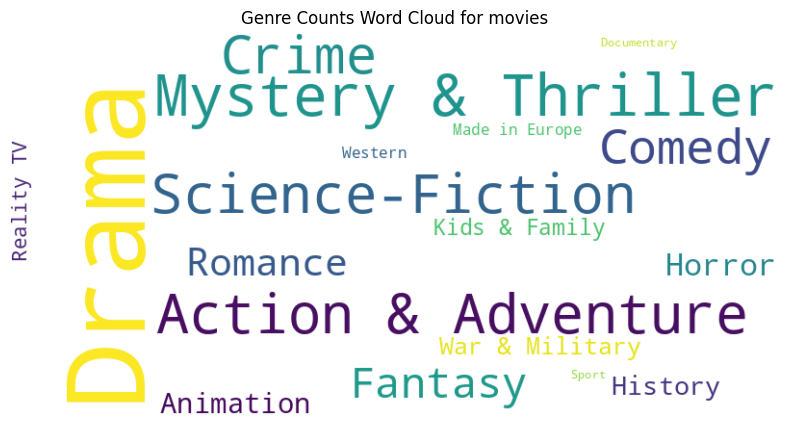

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_freq = dict(genre_counts_movies)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Counts Word Cloud for movies')
plt.show()

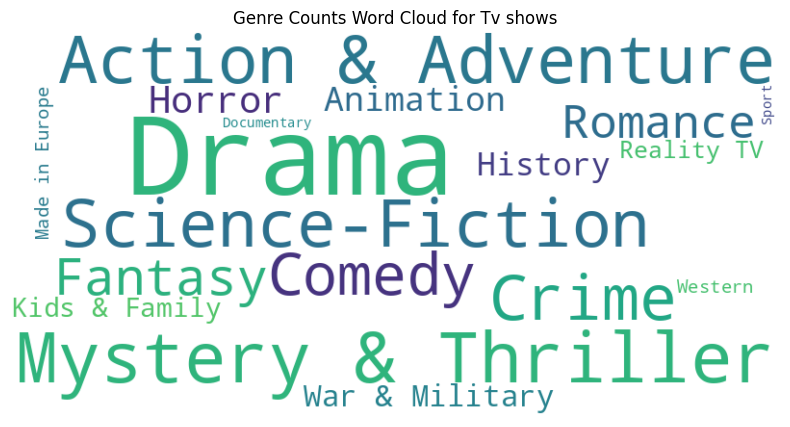

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
genre_freq = dict(genre_counts_tv)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Counts Word Cloud for Tv shows')
plt.show()

## **Finding Predominant Streaming Service**

TO CLARIFY WHY I USED INDEX[1] BECAUSE THE MOST OF THE FEILDS ARE NA SO I TOOK THE SECOND INDEX TO GET THE STREAM PROVIDER

In [ ]:
stream_provider_counts = movies_df['stream_provider'].value_counts()

# Find the most common stream provider
predominant_stream_provider = stream_provider_counts.index[1]

print(f'The  predominant stream provider is: {predominant_stream_provider}')

The  predominant stream provider is: Apple TV+


In [ ]:
stream_provider_counts = tv_df['stream_provider'].value_counts()

# Find the most common stream provider
predominant_stream_provider = stream_provider_counts.index[1]

print(f'The  predominant stream provider is: {predominant_stream_provider}')

The  predominant stream provider is: Amazon Prime Video


## **Task 3 :- Data Export**

In [ ]:
# Export movies_df to CSV
movies_df.to_csv('filtered_movies_data.csv', index=False)

# Export tv_df to CSV
tv_df.to_csv('filtered_tv_shows_data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1Em2lieJhqGwuGJjAJQF7Kbi_qssSUfjV?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***